# Sprint7 クラスタリングのスクラッチ

In [24]:
import numpy as np

class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        self.mu = None      # 中心点
        self.r = None       # クラスの割当Matrix (n_samples分)
        self.sse = None     # クラスタ内誤差平方和 (SSE)
        self.best_mu = None # 最も良い学習結果となった中心点（SSEが最小のもの）
        self.best_r = None  # 最も良い学習結果となったクラスの割当Matrix (n_samples分)
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
        
    
        for _ in range(self.n_init):
            # 問題1
            # ランダムにクラスタ数を選ぶ
            self.mu = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

            # r_nk: クラスの割当用のMatrix(n_samples, n_clusters)
            # 初期化
            self.r = np.zeros((X.shape[0], self.n_clusters))

            for _ in range(self.max_iter):

                # 問題3
                # クラスタへの割り当て
                norm = np.array([np.linalg.norm(X - mu, axis=1) for mu in self.mu])

                # 各データの最も近い中心点（K）に割り当てる。argminで最小値のIndex(=所属している中心点μK)
                # self.rはデータが所属する中心点の番号を示している
                self.r =  norm.argmin(axis=0)

                # 問題4
                # 各クラスタのデータ点の平均を計算し、それを新しい中心点として更新する。
                new_mu = np.array([X[self.r == k, :].mean(axis = 0) for k in range(self.n_clusters)])

                # 問題5
                # 中心点 μk と重心の差の合計が指定した許容値以下の場合は、中心点の移動を終了する
                if np.allclose(self.mu, new_mu, rtol=self.tol):
                    break

                self.mu = new_mu

            sse = self._sse(X)

            # 問題6
            # SSEが最小になったものが最終的な学習結果の中心点を保持する
            if self.sse is None or sse < self.sse:
                self.sse = sse
                self.best_mu = self.mu
                self.best_r = self.r
        
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return
    
    # 問題2
    def _sse(self, X):
        """
        クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算
        """
        sse = 0

        for i in range(X.shape[0]):
            sse += np.linalg.norm(X[i]-self.mu[self.r[i]])**2

        return sse

## シンプルデータセット3

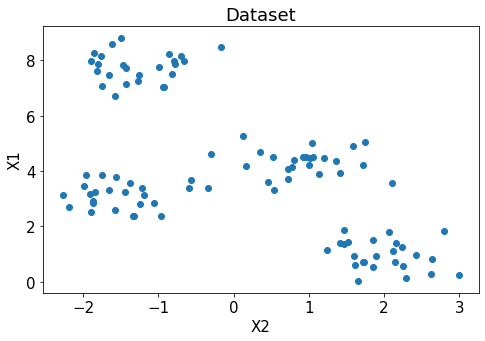

In [25]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(7,5))

plt.title('Dataset')
plt.xlabel('X2')
plt.ylabel('X1')
plt.scatter(X[:,0], X[:, 1])

plt.tight_layout()
plt.show()

## 【問題1】中心点の初期値を決める
---
入力されたデータから$K$個の中心点$μ_1$から$μK$の初期値を決めるコードを作成してください。$K$は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点$X_n$の中からランダムに$K$個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点$μ$の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

## 【問題2】SSEを求める関数の作成
---
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する$rnk$と$μ_k$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE=\sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}{∥X_n−μ_k∥}^2
$$

n: データ点のインデックス

k: クラスタのインデックス

$X_n$: n番目のデータ点

$μ_k$: k番目の中心点

$r_nk$: データ点Xnがクラスタ$k$に所属していたら1、そうでなければ0

## 【問題3】クラスタへの割り当て
---
すべてのデータ点$X_n$を最も近い中心点$μ_k$に割り当てるコードを作成してください。

K-menasにおける*近い* とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$に対しては以下の数式で表現できます。
$$
∥q−p∥=\sqrt{(q−p)⋅(q−p)}
$$
NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。

numpy.linalg.norm — NumPy v1.17 Manual

中心点 μk
を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [26]:
# テスト
mu = X[10:13]
print("self.mu", mu)
print("X[:3]:", X[:3])

print("mu[0]:", mu[0])
print("X[0]:", X[0])
print("d[0]", np.linalg.norm(X[0]-mu[0]))
print("d[1]", np.linalg.norm(X[1]-mu[0]))
print("d[2]", np.linalg.norm(X[2]-mu[0]))
print("d[all]", np.linalg.norm(X-mu[0], axis=1))
print(X.shape)
print(np.linalg.norm(X-mu[0], axis=1).shape)

self.mu [[-0.92819001  7.02698199]
 [-1.74836345  7.06307447]
 [-1.26789718  7.25141327]]
X[:3]: [[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]]
mu[0]: [-0.92819001  7.02698199]
X[0]: [0.72086751 3.71347124]
d[0] 3.701181467196607
d[1] 1.349622756896961
d[2] 3.50845756001996
d[all] [3.70118147 1.34962276 3.50845756 3.21710932 3.29413352 3.34494999
 3.31777847 0.86617044 2.03963562 0.85387814 0.         0.82096719
 0.40714906 0.72506281 0.49496973 7.85425899 5.6872661  3.68486521
 4.19881304 7.62517628 4.59811665 1.07073294 3.96348079 7.6104661
 2.91918734 4.48785879 3.38831689 3.16081887 6.38290793 7.17249545
 6.84196544 0.01053535 7.03631833 6.02926866 3.65963818 3.76453504
 1.86232349 6.1796583  1.66154407 4.62540676 2.80904393 3.82645045
 0.70989295 3.70405044 4.28953069 1.54421758 6.90600234 3.88069359
 3.37313213 3.9904923  2.66140901 6.72464556 4.22466895 3.28742547
 4.64920023 0.55091137 1.22200451 6.92757157 6.58471828 1.00500703
 0.51157885 6.

## 【問題7】推定
---
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

-    データ点$X_n$と学習で決まった中心点$μ_k$に対し、*SSE*を最小化する$r_{nk}$を選ぶ。


具体的には次のことです。

-    データ点$X_n$を最も近い$μ_k$に割り当てる。

>### Scratch実装コード

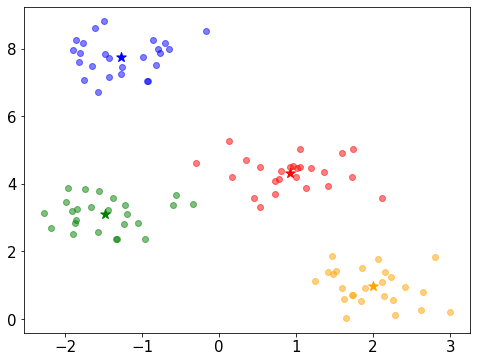

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データと検証データの分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# KMeansスクラッチのインスタンス
n_clusters = 4   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差


knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(X)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink']
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

for i in range(n_clusters):
    plt.scatter(X[knn.best_r == i, 0], X[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color=scatter_color[i], s=100, marker='*')

plt.show()


## 【問題8】エルボー法の実装
---
K-meansにおいて中心点の個数$k$は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数$k$を検討するためのコードを作成してください。

SSEを縦軸、クラスタ数$k$を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

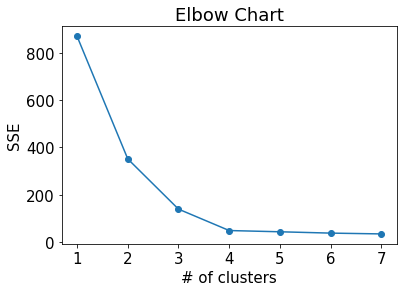

In [49]:
# KMeansスクラッチのインスタンス
n_clusters = range(1, 8) # クラスタ数
n_init = 3     # 中心点の初期値を何回変えて計算するか
max_iter = 10  # 1回の計算で最大何イテレーションするか
tol = 0.01     # イテレーションを終了する基準となる中心点と重心の許容誤差
sse = []

for i in n_clusters:
    model = ScratchKMeans(i, n_init, max_iter, tol)
    model.fit(X)
    sse.append(model.sse)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(6,4))
plt.title("Elbow Chart")
plt.xlabel("# of clusters")
plt.ylabel("SSE")
plt.plot(n_clusters, sse, marker='o')
plt.show()


## 卸売業者のデータ分析
---
クラスタリングの利用法を学ぶために、Wholesale customers Data Setを使用します。

UCI Machine Learning Repository: Wholesale customers Data Set

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

次元削減

金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

## 【問題10】クラスタ数kの選択
---
最適だと思われるクラスタ数$k$を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

### 《PCAのサンプルコード》
---

In [29]:
import pandas as pd
data = pd.read_csv("Wholesale customers data.csv")
print(data.info())
data1 = data.drop(['Channel', 'Region'], axis=1).values
print(data1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


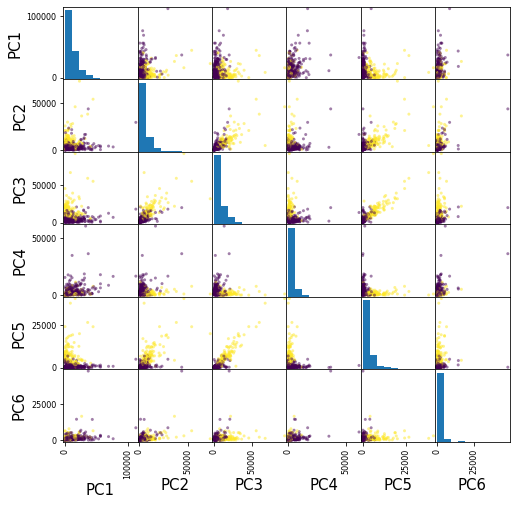

In [30]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(data1, 
                        columns=["PC{}".format(x + 1) for x in range(6)]), 
                        figsize=(8, 8), c=list(data.iloc[:, 0]), alpha=0.5) 
plt.show()

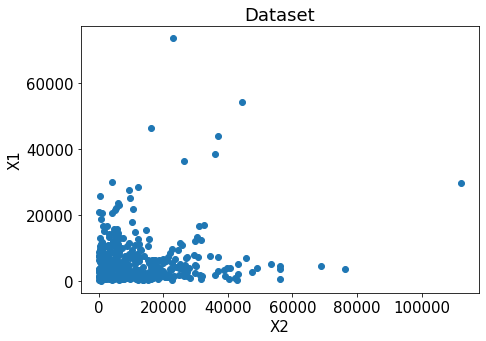

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(7,5))

plt.title('Dataset')
plt.xlabel('X2')
plt.ylabel('X1')
plt.scatter(data1[:,0], data1[:, 1])

plt.tight_layout()
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data1)
data_pca = pca.transform(data1)

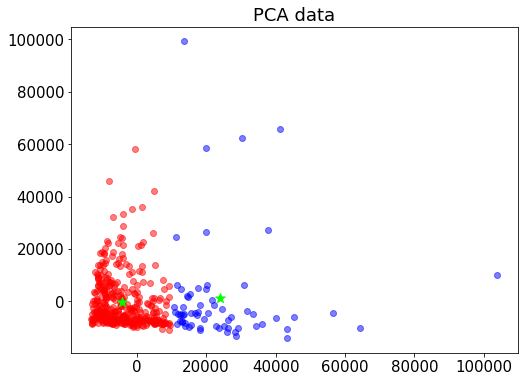

In [33]:
# KMeansスクラッチのインスタンス
n_clusters = 2   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差


knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(data_pca)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink']
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.title("PCA data")
for i in range(n_clusters):
    plt.scatter(data_pca[knn.best_r == i, 0], data_pca[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color='lime', s=100, marker='*')

plt.show()

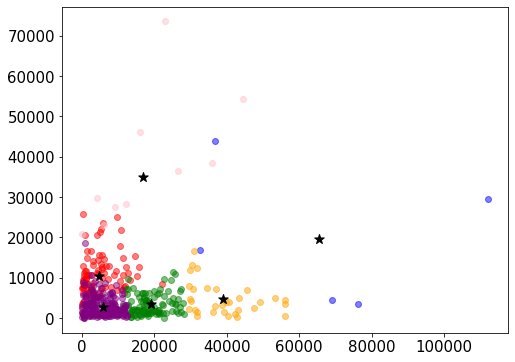

In [34]:
# KMeansスクラッチのインスタンス
n_clusters = 6   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差


knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(data1)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink', 'purple']
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

for i in range(n_clusters):
    plt.scatter(data1[knn.best_r == i, 0], data1[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color='black', s=100, marker='*')

plt.show()

### 《PCAの分散説明率を表示するコードサンプル》
---

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


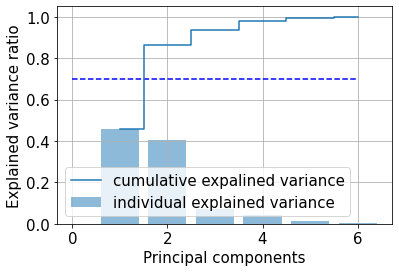

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data1)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

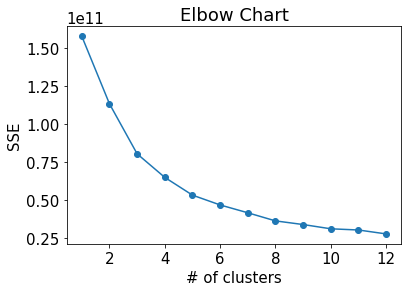

In [36]:
# KMeansスクラッチのインスタンス
n_clusters = range(1, 13) # クラスタ数
n_init = 20     # 中心点の初期値を何回変えて計算するか
max_iter = 500  # 1回の計算で最大何イテレーションするか
tol = 0.0001     # イテレーションを終了する基準となる中心点と重心の許容誤差
sse = []

for i in n_clusters:
    model = ScratchKMeans(i, n_init, max_iter, tol)
    model.fit(data1)
    sse.append(model.sse)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(6,4))
plt.title("Elbow Chart")
plt.xlabel("# of clusters")
plt.ylabel("SSE")
plt.plot(n_clusters, sse, marker='o')
plt.show()

### 結論
---
最適だと思われるクラスタ数は5だと思われる。エルボー法のグラフから5あたりからあまりクラスタ数を増やしても変化がないように見受けられる。

## 【問題11】既知のグループとの比較
---
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


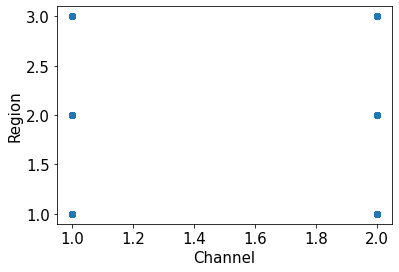

In [37]:
print(data.head())

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(6,4))
# plt.title("Elbow Chart")
plt.xlabel("Channel")
plt.ylabel("Region")
plt.scatter(data['Channel'], data['Region'])
plt.show()

In [38]:
print("Channel :\n", data['Channel'].value_counts())
print("Region :\n", data['Region'].value_counts())

Channel :
 1    298
2    142
Name: Channel, dtype: int64
Region :
 3    316
1     77
2     47
Name: Region, dtype: int64


### まとめ
---
ChannelとRegionのデータを可視化すると、データの値が両方とも偏っており、これらの既知グループは他の特徴量と異なることが分かる。また既知グループ（ChannelとRegion）のデータ値そのものが一桁とラベリングする値を用いているように見受けられる。

## 【問題12】卸売業者にとって有益な情報
---
卸売業者にとって有益な情報を探し出し文章にまとめてください。

《ヒント》

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。。

In [39]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [40]:
channel_grouped = data.groupby('Channel')

print(channel_grouped.size())
print(channel_grouped.count())

Channel
1    298
2    142
dtype: int64
         Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel                                                                    
1           298    298   298      298     298               298         298
2           142    142   142      142     142               142         142


Channelで見た時にChannel=1の方が取引が倍近くある

In [41]:
data.drop('Region',axis=1).groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,4015717,1028614,1180717,1116979,235587,421955
2,1264414,1521743,2317845,234671,1032270,248988


Channelで各特徴量の合計値を見ると、Detergents_Paper以外はグループ1の方が高い。Channelのグループの比率の側面からみても想定内の結果だと言える。
Detergents_Paperはグループ2の方が合計金が高いので、おそらく外れ値が含まれていると推測できるので、この特徴量はあまり有益がないと判断しても良いかも。

In [42]:
region_grouped = data.groupby('Region')

print(region_grouped.size())
print(region_grouped.count())

Region
1     77
2     47
3    316
dtype: int64
        Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Region                                                                     
1            77     77    77       77      77                77          77
2            47     47    47       47      47                47          47
3           316    316   316      316     316               316         316


Regionで見た時にRegion=3のが一番多い。

In [43]:
data.drop('Channel',axis=1).groupby(['Region']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,854833,422454,570037,231026,204136,104327
2,464721,239144,433274,190132,173311,54506
3,3960577,1888759,2495251,930492,890410,512110


Regionのグループ3で金額を比較してみると、Fresh, Grocery, Milkの順で多い。

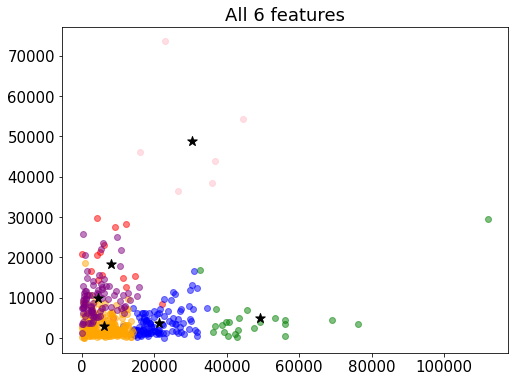

In [44]:
# KMeansスクラッチのインスタンス
n_clusters = 6   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差


knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(data1)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink', 'purple']
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.title("All 6 features")
for i in range(n_clusters):
    plt.scatter(data1[knn.best_r == i, 0], data1[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color='black', s=100, marker='*')

plt.show()

すべて6つの特徴量をKmeansで可視化してみた。
オレンジ色とピンク色に属するクラスタが他の色と比べて少ない。

In [45]:
# data2 = data.drop(['Channel', 'Region'], axis=1).values
data2 = data[['Fresh', 'Milk', 'Grocery']]
print(data2)
data2 = data2.values

     Fresh   Milk  Grocery
0    12669   9656     7561
1     7057   9810     9568
2     6353   8808     7684
3    13265   1196     4221
4    22615   5410     7198
..     ...    ...      ...
435  29703  12051    16027
436  39228   1431      764
437  14531  15488    30243
438  10290   1981     2232
439   2787   1698     2510

[440 rows x 3 columns]


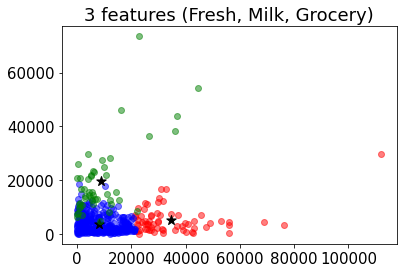

In [46]:
# KMeansスクラッチのインスタンス
n_clusters = 3   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差

knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(data2)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink', 'purple']
plt.rcParams['font.size'] = 15
# fig = plt.figure(figsize=(8,6))

plt.title("3 features (Fresh, Milk, Grocery)")
for i in range(n_clusters):
    plt.scatter(data2[knn.best_r == i, 0], data2[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color='black', s=100, marker='*')

plt.show()

比較的、有益な特徴量を3つピックアップしてKmeansで可視化してみた。
均等的に分類されている感じに見える。

In [47]:
data3 = data[['Frozen', 'Detergents_Paper', 'Delicassen']]
print(data3)
data3 = data3.values

     Frozen  Detergents_Paper  Delicassen
0       214              2674        1338
1      1762              3293        1776
2      2405              3516        7844
3      6404               507        1788
4      3915              1777        5185
..      ...               ...         ...
435   13135               182        2204
436    4510                93        2346
437     437             14841        1867
438    1038               168        2125
439      65               477          52

[440 rows x 3 columns]


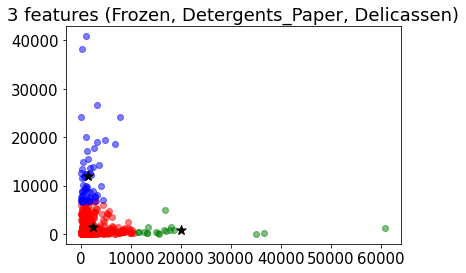

In [48]:
# KMeansスクラッチのインスタンス
n_clusters = 3   # クラスタ数
n_init = 5       # 中心点の初期値を何回変えて計算するか
max_iter = 20    # 1回の計算で最大何イテレーションするか
tol = 0.001      # イテレーションを終了する基準となる中心点と重心の許容誤差


knn = ScratchKMeans(n_clusters, n_init, max_iter, tol)
knn.fit(data3)

# plot
import matplotlib.pyplot as plt
%matplotlib inline

scatter_color = ['red', 'blue', 'green', 'orange', 'pink', 'purple']
plt.rcParams['font.size'] = 15
# fig = plt.figure(figsize=(8,6))

plt.title("3 features (Frozen, Detergents_Paper, Delicassen)")
for i in range(n_clusters):
    plt.scatter(data3[knn.best_r == i, 0], data3[knn.best_r == i, 1], color=scatter_color[i], alpha=0.5)
    plt.scatter(knn.best_mu[i, 0], knn.best_mu[i, 1], color='black', s=100, marker='*')

plt.show()

比較的、あまり有益ではない特徴量を3つピックアップしてKmeansで可視化してみた。
上のグラフと比較すると、クラスタが偏っているように見え、青色のクラスタは他のクラスタより数が少ないように見える。

### まとめ
---
データの統計やKmeansで可視化したグラフを基に卸業者にとって有益な情報はFresh, Milk, Groceryの特徴量あたりと思われる。特徴量の中でも金額が大きいことが１つの要素と言えそうである。また、Kmeansで可視化した時に、均等にクラスタの分類がされているように見える。

